In [9]:
import numpy as np
import pandas as pd

data_mahasiswa = pd.read_csv("dataMahasiswa.csv")
data_mahasiswa

,mhs,ipk,gaji
0,A,3.00,10
1,B,2.99,1


In [10]:
# data ipk 
data_ipk = np.array (data_mahasiswa)
data_ipk = data_ipk[:,[0,1]]

ipk_A = np.sum(data_ipk[0:1,1], axis =0)
ipk_B = np.sum(data_ipk[1:2,1], axis =0)

print("ipk_A :", ipk_A)
print("ipk_B :", ipk_B)

ipk_A : 3.0
ipk_B : 2.99


In [11]:
# data gaji
data_gaji = np.array (data_mahasiswa)
data_gaji = data_gaji[:,[0,2]]

gaji_A = np.sum(data_gaji[0:1,1], axis =0)
gaji_B = np.sum(data_gaji[1:2,1], axis =0)

print("gaji_A :", gaji_A)
print("gaji_B :", gaji_B)


gaji_A : 10
gaji_B : 1


In [12]:
!pip install -U scikit_fuzzy

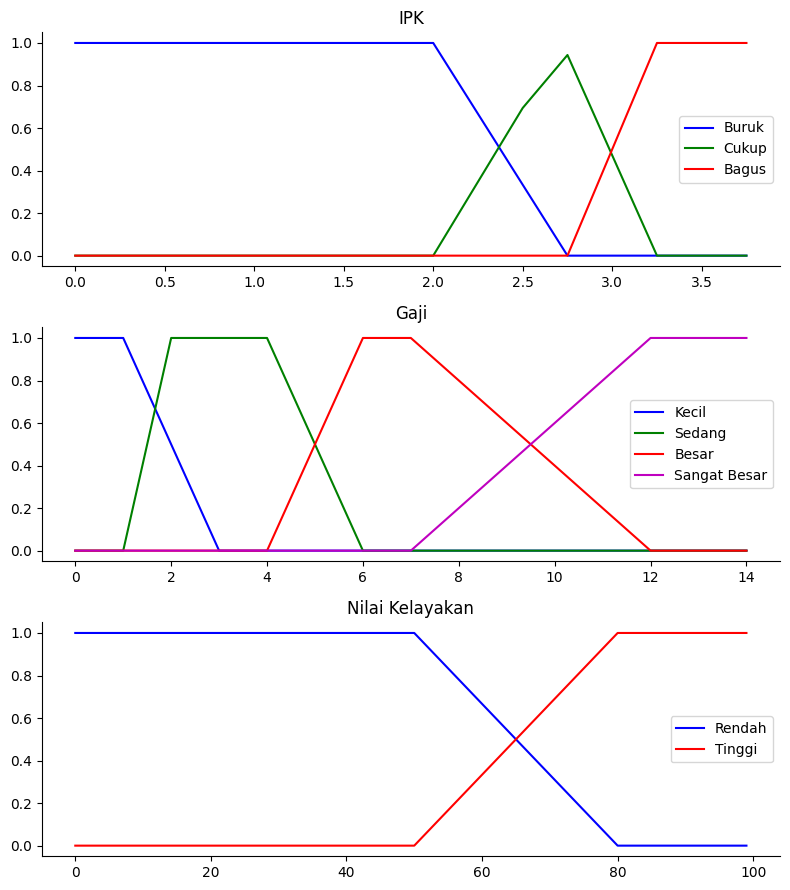

In [13]:
import skfuzzy as fuzz
import matplotlib.pyplot as plt

#Semesta Pembicaraan
x_ipk = np.arange(0,4,0.25)
x_gaji = np.arange(0,15,1)
x_nk = np.arange(0,100,1)

#Membership Function 
#ipk
ipk_buruk = fuzz.trapmf (x_ipk, [0,0,2,2.75])
ipk_cukup = fuzz.trimf (x_ipk, [2,2.72,3.25])
ipk_bagus = fuzz.trapmf (x_ipk, [2.75, 3.25, 4, 4])

#gaji
gaji_kecil = fuzz.trapmf (x_gaji, [0,0,1,3])
gaji_sedang = fuzz.trapmf (x_gaji, [1,2,4,6])
gaji_besar = fuzz.trapmf (x_gaji, [4,6,7,12])
gaji_sangat_besar = fuzz.trapmf (x_gaji, [7,12,15,15])

#nilai kelayakan 
nk_rendah = fuzz.trapmf(x_nk, [0,0,50,80])
nk_tinggi= fuzz.trapmf(x_nk, [50,80,100,100])


# Kurva membership Function
fig, (ax0, ax1, ax2) = plt.subplots (nrows=3, figsize=(8,9))

ax0.plot(x_ipk, ipk_buruk, 'b', linewidth=1.5, label='Buruk')
ax0.plot(x_ipk, ipk_cukup, 'g', linewidth=1.5, label='Cukup')
ax0.plot(x_ipk, ipk_bagus, 'r', linewidth=1.5, label='Bagus')
ax0.set_title ('IPK')
ax0.legend()

ax1.plot(x_gaji, gaji_kecil, 'b', linewidth=1.5, label='Kecil')
ax1.plot(x_gaji, gaji_sedang, 'g', linewidth=1.5, label='Sedang')
ax1.plot(x_gaji, gaji_besar, 'r', linewidth=1.5, label='Besar')
ax1.plot(x_gaji, gaji_sangat_besar, 'm', linewidth=1.5, label='Sangat Besar')
ax1.set_title ('Gaji')
ax1.legend()

ax2.plot(x_nk, nk_rendah, 'b', linewidth=1.5, label='Rendah')
ax2.plot(x_nk, nk_tinggi, 'r', linewidth=1.5, label='Tinggi')
ax2.set_title ('Nilai Kelayakan')
ax2.legend()

for ax in (ax0, ax1, ax2) :
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis ().tick_bottom()
    ax.get_yaxis ().tick_left()
    
plt.tight_layout()

In [14]:
# Fungsi Keanggotaan IPK
def fungsiKeanggotaan_IPK (_nilai) :
    buruk = fuzz.interp_membership (x_ipk,ipk_buruk, _nilai)
    cukup = fuzz.interp_membership (x_ipk,ipk_cukup, _nilai)
    bagus = fuzz.interp_membership (x_ipk,ipk_bagus, _nilai)
    
    return buruk, cukup, bagus

def fungsiKeanggotaan_Gaji(_nilai) :
    kecil = fuzz.interp_membership (x_gaji, gaji_kecil, _nilai)
    sedang = fuzz.interp_membership (x_gaji, gaji_sedang, _nilai)
    besar = fuzz.interp_membership (x_gaji, gaji_besar, _nilai)
    sangat_besar = fuzz.interp_membership (x_gaji, gaji_sangat_besar, _nilai)
    
    return kecil, sedang, besar, sangat_besar

# Menghitung Derajat Keanggotaan IPK
ipk_mhsA = fungsiKeanggotaan_IPK(ipk_A)
ipk_mhsB = fungsiKeanggotaan_IPK(ipk_B)

print("IPK Mahasiswa A : ", ipk_mhsA)
print("IPK Mahasiswa B : ", ipk_mhsB)

IPK Mahasiswa A :  (0.0, 0.47169811320754734, 0.5)
IPK Mahasiswa B :  (0.0, 0.49056603773584884, 0.4800000000000004)


In [15]:
# Menghitung Derajat Keanggotaan Gaji
gaji_mhsA = fungsiKeanggotaan_Gaji(gaji_A)
gaji_mhsB = fungsiKeanggotaan_Gaji(gaji_B)

print("Gaji Mahasiswa A : ", gaji_mhsA)
print("Gaji Mahasiswa B : ", gaji_mhsB)


Gaji Mahasiswa A :  (0.0, 0.0, 0.4, 0.6)
Gaji Mahasiswa B :  (1.0, 0.0, 0.0, 0.0)


In [16]:
nk_7 = np.fmin (ipk_mhsA[1], gaji_mhsA[2])
nk_8 = np.fmin (ipk_mhsA[1], gaji_mhsA[3])
nk_11 = np.fmin (ipk_mhsA[2], gaji_mhsA[2])
nk_12 = np.fmin (ipk_mhsA[2], gaji_mhsA[3])
mhsA_nk_rendah = np.fmax (nk_7, np.fmax(nk_8, nk_12))
mhsA_nk_tinggi = nk_11

print("Nilai Kelayakan Mhs A")
print("NK rendah : ", mhsA_nk_rendah)
print("NK tinggi : ", mhsA_nk_tinggi)

Nilai Kelayakan Mhs A
NK rendah :  0.5
NK tinggi :  0.4


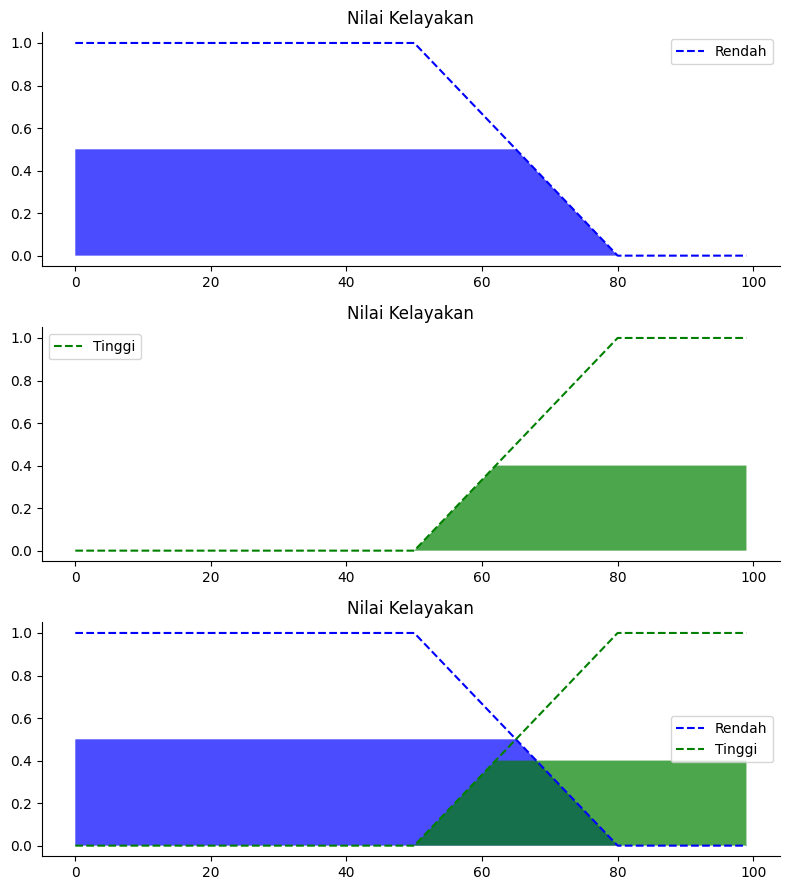

In [19]:
# Untuk Plot Arsir, pakai np.fmin
mhsA_nk_rendah = np.fmin (mhsA_nk_rendah, nk_rendah)
mhsA_nk_tinggi = np.fmin (mhsA_nk_tinggi, nk_tinggi)

# Titik Awal Arsir 
nk0 = np.zeros_like (x_nk)
nkr = np.zeros_like (nk_rendah)
nkt = np.zeros_like (nk_tinggi)

# Visualize This
fig, (ax0, ax1, ax2) = plt.subplots (nrows=3, figsize=(8,9))

#x_nk_rendah = np.arrange (0, 80 1)
ax0.fill_between(x_nk, nkr, mhsA_nk_rendah, facecolor='b',alpha=0.7)
ax0.plot(x_nk, nk_rendah, 'b' , linewidth=1.5, linestyle ='--' , label = 'Rendah')
ax0.set_title('Nilai Kelayakan')
ax0.legend()

ax1.fill_between(x_nk, nkt, mhsA_nk_tinggi, facecolor='g', alpha=0.7)
ax1.plot(x_nk, nk_tinggi, 'g' , linewidth=1.5, linestyle ='--', label = 'Tinggi')
ax1.set_title('Nilai Kelayakan')
ax1.legend()

ax2.fill_between(x_nk, nk0, mhsA_nk_rendah, facecolor='b', alpha=0.7)
ax2.plot(x_nk, nk_rendah, 'b' , linewidth=1.5, linestyle ='--', label = 'Rendah')
ax2.fill_between(x_nk, nk0, mhsA_nk_tinggi, facecolor='g', alpha=0.7)
ax2.plot(x_nk, nk_tinggi, 'g' , linewidth=1.5, linestyle ='--' , label = 'Tinggi')
ax2.set_title('Nilai Kelayakan')
ax2.legend()

# Turn Off Top/Right axes 
for ax in (ax0, ax1, ax2) :
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left ()
    
plt.tight_layout()

In [20]:
nk_5 = np.fmin (ipk_mhsB[1], gaji_mhsB[0])
nk_6 = np.fmin (ipk_mhsB[1], gaji_mhsB[1])
nk_9 = np.fmin (ipk_mhsB[2], gaji_mhsB[0])
nk_10 = np.fmin (ipk_mhsB[2], gaji_mhsB[1])
mhsB_nk_tinggi = np.fmax (nk_5, np.fmax(nk_9, nk_10))
mhsB_nk_rendah = nk_6

print("Nilai Kelayakan Mhs B")
print("NK rendah : ", mhsB_nk_rendah)
print("NK tinggi : ", mhsB_nk_tinggi)

Nilai Kelayakan Mhs B
NK rendah :  0.0
NK tinggi :  0.49056603773584884


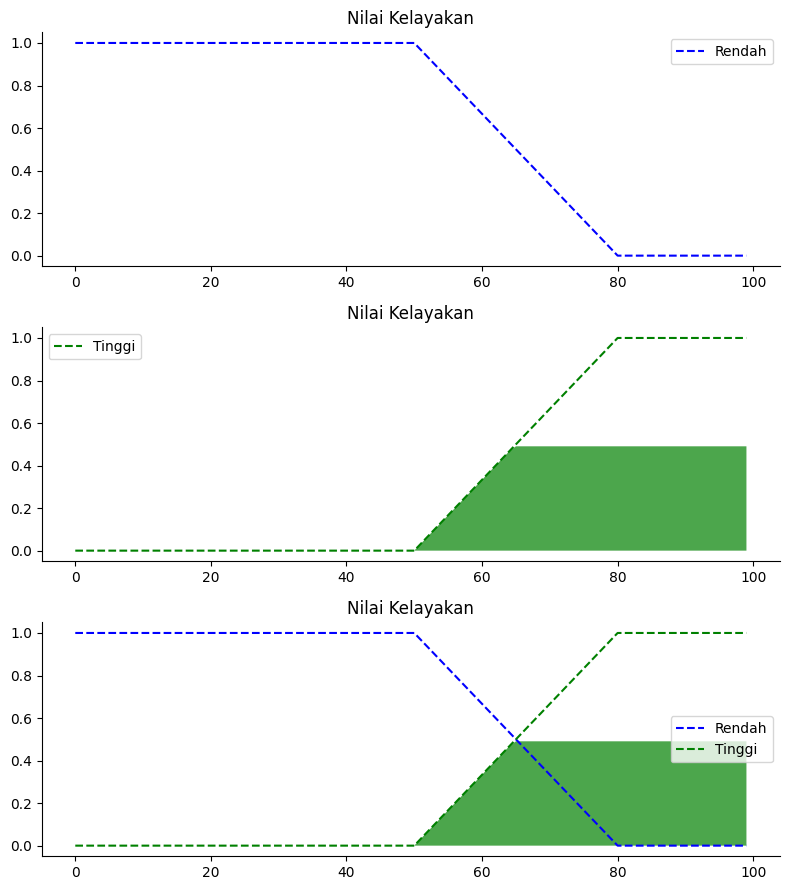

In [21]:
# Untuk Plot Arsir, pakai np.fmin
mhsB_nk_rendah = np.fmin (mhsB_nk_rendah, nk_rendah)
mhsB_nk_tinggi = np.fmin (mhsB_nk_tinggi, nk_tinggi)

# Titik Awal Arsir 
nk0 = np.zeros_like (x_nk)
nkr = np.zeros_like (nk_rendah)
nkt = np.zeros_like (nk_tinggi)

# Visualize This
fig, (ax0, ax1, ax2) = plt.subplots (nrows=3, figsize=(8,9))

#x_nk_rendah = np.arrange (0, 80 1)
ax0.fill_between(x_nk, nkr, mhsB_nk_rendah, facecolor='b',alpha=0.7)
ax0.plot(x_nk, nk_rendah, 'b' , linewidth=1.5, linestyle ='--' , label = 'Rendah')
ax0.set_title('Nilai Kelayakan')
ax0.legend()

ax1.fill_between(x_nk, nkt, mhsB_nk_tinggi, facecolor='g', alpha=0.7)
ax1.plot(x_nk, nk_tinggi, 'g' , linewidth=1.5, linestyle ='--', label = 'Tinggi')
ax1.set_title('Nilai Kelayakan')
ax1.legend()

ax2.fill_between(x_nk, nk0, mhsB_nk_rendah, facecolor='b', alpha=0.7)
ax2.plot(x_nk, nk_rendah, 'b' , linewidth=1.5, linestyle ='--', label = 'Rendah')
ax2.fill_between(x_nk, nk0, mhsB_nk_tinggi, facecolor='g', alpha=0.7)
ax2.plot(x_nk, nk_tinggi, 'g' , linewidth=1.5, linestyle ='--' , label = 'Tinggi')
ax2.set_title('Nilai Kelayakan')
ax2.legend()

# Turn Off Top/Right axes 
for ax in (ax0, ax1, ax2) :
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left ()
    
plt.tight_layout()

In [23]:
# Komposisi Aturan 
komposisi = np.fmax (mhsA_nk_rendah, mhsA_nk_tinggi)

# Hasil Defuzzifikasi 
nk = fuzz.defuzz (x_nk, komposisi, 'centroid')
print("Nilai Kelayakan Mhs A : ", nk)

# Nilai Fuzzy utk Membership Function 
nk_defuzzy = fuzz.interp_membership(x_nk, komposisi, nk)
nk_defuzzy 

Nilai Kelayakan Mhs A :  47.16432432432437


0.5

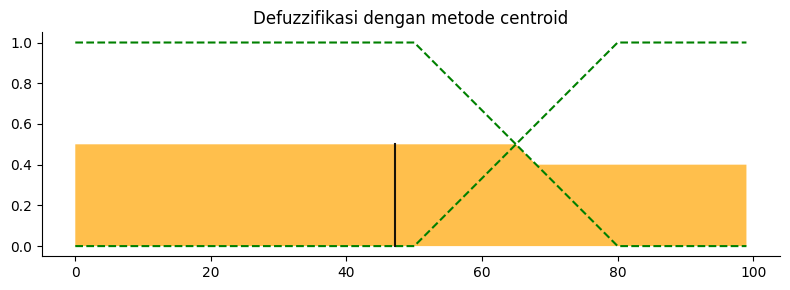

In [26]:
# Visualisasi Hasil
fig, ax0 = plt.subplots (figsize=(8,3))

ax0.plot(x_nk, nk_rendah, 'g', linewidth=1.5, linestyle='--', label = 'Rendah')
ax0.plot(x_nk, nk_tinggi, 'g' , linewidth=1.5, linestyle ='--' , label = 'Tinggi')
ax0.fill_between (x_nk, nk0, komposisi, facecolor='Orange', alpha =0.7)
ax0.plot ([nk ,nk], [0, nk_defuzzy], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Defuzzifikasi dengan metode centroid')

# Turn Off Top/Right axes 
for ax in (ax0,) :
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left ()
    
plt.tight_layout()

In [31]:
# Komposisi Aturan 
komposisi = np.fmax (mhsB_nk_rendah, mhsB_nk_tinggi)

# Hasil Defuzzifikasi 
nk = fuzz.defuzz (x_nk, komposisi, 'centroid')
print("Nilai Kelayakan Mhs B : ", nk)

# Nilai Fuzzy utk Membership Function 
nk_defuzzy = fuzz.interp_membership(x_nk, komposisi, nk)
nk_defuzzy 

Nilai Kelayakan Mhs B :  77.96474210931481


0.49056603773584884

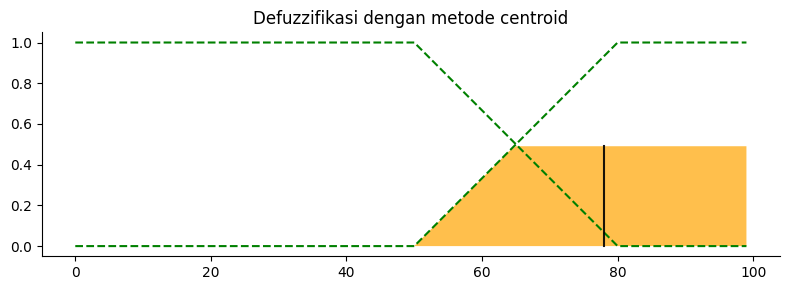

In [34]:
# Visualisasi Hasil
fig, ax0 = plt.subplots (figsize=(8,3))

ax0.plot(x_nk, nk_rendah, 'g', linewidth=1.5, linestyle='--', label = 'Rendah')
ax0.plot(x_nk, nk_tinggi, 'g' , linewidth=1.5, linestyle ='--' , label = 'Tinggi')
ax0.fill_between (x_nk, nk0, komposisi, facecolor='Orange', alpha =0.7)
ax0.plot ([nk ,nk], [0, nk_defuzzy], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Defuzzifikasi dengan metode centroid')

# Turn Off Top/Right axes 
for ax in (ax0,) :
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left ()
    
plt.tight_layout()